In [35]:
import numpy as np
import torch
from IPython.display import display_markdown

In [36]:
_root_pos = np.load("../_root_pos.npy")
print(_root_pos.shape, _root_pos.dtype)
_root_pos[:4]

(197, 3) float64


array([[ 0.        ,  0.966035  ,  0.        ],
       [-0.00995008,  0.96196433,  0.02657158],
       [-0.01990017,  0.95789367,  0.05314317],
       [-0.02985025,  0.953823  ,  0.07971475]])

In [37]:
velocity = (_root_pos[1:] - _root_pos[:-1]).copy()

In [38]:
velocity[0]

array([-0.00995008, -0.00407067,  0.02657158])

In [51]:
for dtype in [np.float16, np.float32, np.float64]:
    r_pos = np.zeros((velocity.shape[0] + 1, velocity.shape[1]), dtype=dtype)
    r_pos[1:] = velocity
    r_pos = np.cumsum(r_pos, axis=-2)

    display_markdown(f"### Last `4` Frames using `{dtype.__name__}`", raw=True)
    print(_root_pos[-4:], "\n", r_pos[-4:])

### Last `4` Frames using `float16`

[[ 1.296685  0.957293 -0.28775 ]
 [ 1.297513  0.95721  -0.284793]
 [ 1.298714  0.95719  -0.282019]
 [ 1.300083  0.957362 -0.279505]] 
 [[ 1.296    -0.00873  -0.2927  ]
 [ 1.297    -0.00881  -0.2898  ]
 [ 1.298    -0.008835 -0.287   ]
 [ 1.299    -0.00866  -0.2847  ]]


### Last `4` Frames using `float32`

[[ 1.296685  0.957293 -0.28775 ]
 [ 1.297513  0.95721  -0.284793]
 [ 1.298714  0.95719  -0.282019]
 [ 1.300083  0.957362 -0.279505]] 
 [[ 1.2966838  -0.00874199 -0.28774852]
 [ 1.2975118  -0.00882499 -0.28479153]
 [ 1.2987128  -0.00884499 -0.28201753]
 [ 1.3000818  -0.00867299 -0.27950352]]


### Last `4` Frames using `float64`

[[ 1.296685  0.957293 -0.28775 ]
 [ 1.297513  0.95721  -0.284793]
 [ 1.298714  0.95719  -0.282019]
 [ 1.300083  0.957362 -0.279505]] 
 [[ 1.296685 -0.008742 -0.28775 ]
 [ 1.297513 -0.008825 -0.284793]
 [ 1.298714 -0.008845 -0.282019]
 [ 1.300083 -0.008673 -0.279505]]


`difference` taken from a debug session:

In [56]:
difference = np.array(
    [
        [0.0000, 0.0000, 0.0000],
        [-0.0001, 0.0000, -0.0000],
        [-0.0003, 0.0000, -0.0001],
        [-0.0004, 0.0000, -0.0001],
        [-0.0005, 0.0000, -0.0002],
        [-0.0006, 0.0000, -0.0002],
        [-0.0008, 0.0000, -0.0003],
        [-0.0009, 0.0000, -0.0003],
        [-0.0010, 0.0000, -0.0004],
        [-0.0012, 0.0000, -0.0004],
        [-0.0013, 0.0000, -0.0005],
        [-0.0014, 0.0000, -0.0005],
        [-0.0015, 0.0000, -0.0006],
        [-0.0018, 0.0000, -0.0007],
        [-0.0021, 0.0000, -0.0008],
        [-0.0023, 0.0000, -0.0009],
        [-0.0026, 0.0000, -0.0009],
        [-0.0029, 0.0000, -0.0010],
        [-0.0032, 0.0000, -0.0011],
        [-0.0035, 0.0000, -0.0011],
        [-0.0039, 0.0000, -0.0012],
        [-0.0042, 0.0000, -0.0012],
        [-0.0045, 0.0000, -0.0013],
        [-0.0048, 0.0000, -0.0013],
        [-0.0052, 0.0000, -0.0013],
        [-0.0055, 0.0000, -0.0013],
        [-0.0059, 0.0000, -0.0013],
        [-0.0062, 0.0000, -0.0013],
        [-0.0065, 0.0000, -0.0013],
        [-0.0069, 0.0000, -0.0014],
        [-0.0073, 0.0000, -0.0014],
        [-0.0076, 0.0000, -0.0015],
        [-0.0080, 0.0000, -0.0015],
        [-0.0083, 0.0000, -0.0015],
        [-0.0087, 0.0000, -0.0016],
        [-0.0090, 0.0000, -0.0016],
        [-0.0094, 0.0000, -0.0016],
        [-0.0097, 0.0000, -0.0016],
        [-0.0100, 0.0000, -0.0017],
        [-0.0104, 0.0000, -0.0017],
        [-0.0107, 0.0000, -0.0017],
        [-0.0110, 0.0000, -0.0016],
        [-0.0114, 0.0000, -0.0015],
        [-0.0117, 0.0000, -0.0015],
        [-0.0121, 0.0000, -0.0014],
        [-0.0124, 0.0000, -0.0013],
        [-0.0128, 0.0000, -0.0013],
        [-0.0130, 0.0000, -0.0012],
        [-0.0133, 0.0000, -0.0011],
        [-0.0135, 0.0000, -0.0010],
        [-0.0138, 0.0000, -0.0009],
        [-0.0140, 0.0000, -0.0008],
        [-0.0143, 0.0000, -0.0008],
        [-0.0145, 0.0000, -0.0007],
        [-0.0148, 0.0000, -0.0006],
        [-0.0150, 0.0000, -0.0005],
        [-0.0153, 0.0000, -0.0004],
        [-0.0154, 0.0000, -0.0003],
        [-0.0155, 0.0000, -0.0003],
        [-0.0156, 0.0000, -0.0002],
        [-0.0157, 0.0000, -0.0001],
        [-0.0158, 0.0000, -0.0000],
        [-0.0160, 0.0000, 0.0001],
        [-0.0159, 0.0000, 0.0001],
        [-0.0158, 0.0000, 0.0002],
        [-0.0157, 0.0000, 0.0003],
        [-0.0157, 0.0000, 0.0004],
        [-0.0156, 0.0000, 0.0005],
        [-0.0155, 0.0000, 0.0006],
        [-0.0154, 0.0000, 0.0006],
        [-0.0153, 0.0000, 0.0007],
        [-0.0152, 0.0000, 0.0008],
        [-0.0150, 0.0000, 0.0009],
        [-0.0149, 0.0000, 0.0009],
        [-0.0147, 0.0000, 0.0010],
        [-0.0146, 0.0000, 0.0011],
        [-0.0144, 0.0000, 0.0011],
        [-0.0143, 0.0000, 0.0012],
        [-0.0142, 0.0000, 0.0013],
        [-0.0140, 0.0000, 0.0013],
        [-0.0139, 0.0000, 0.0014],
        [-0.0137, 0.0000, 0.0015],
        [-0.0134, 0.0000, 0.0016],
        [-0.0132, 0.0000, 0.0017],
        [-0.0130, 0.0000, 0.0018],
        [-0.0128, 0.0000, 0.0020],
        [-0.0125, 0.0000, 0.0021],
        [-0.0123, 0.0000, 0.0022],
        [-0.0121, 0.0000, 0.0023],
        [-0.0118, 0.0000, 0.0023],
        [-0.0116, 0.0000, 0.0023],
        [-0.0113, 0.0000, 0.0023],
        [-0.0111, 0.0000, 0.0023],
        [-0.0108, 0.0000, 0.0024],
        [-0.0106, 0.0000, 0.0024],
        [-0.0103, 0.0000, 0.0024],
        [-0.0101, 0.0000, 0.0024],
        [-0.0098, 0.0000, 0.0025],
        [-0.0111, 0.0000, 0.0023],
        [-0.0124, 0.0000, 0.0021],
        [-0.0136, 0.0000, 0.0019],
        [-0.0149, 0.0000, 0.0018],
        [-0.0162, 0.0000, 0.0016],
        [-0.0175, 0.0000, 0.0014],
        [-0.0187, 0.0000, 0.0013],
        [-0.0200, 0.0000, 0.0011],
        [-0.0213, 0.0000, 0.0009],
        [-0.0226, 0.0000, 0.0008],
        [-0.0238, 0.0000, 0.0006],
        [-0.0255, 0.0000, 0.0004],
        [-0.0271, 0.0000, 0.0001],
        [-0.0287, 0.0000, -0.0001],
        [-0.0303, 0.0000, -0.0003],
        [-0.0319, 0.0000, -0.0006],
        [-0.0336, 0.0000, -0.0008],
        [-0.0352, 0.0000, -0.0010],
        [-0.0368, 0.0000, -0.0013],
        [-0.0384, 0.0000, -0.0015],
        [-0.0401, 0.0000, -0.0017],
        [-0.0417, 0.0000, -0.0020],
        [-0.0430, 0.0000, -0.0022],
        [-0.0442, 0.0000, -0.0024],
        [-0.0455, 0.0000, -0.0026],
        [-0.0468, 0.0000, -0.0028],
        [-0.0481, 0.0000, -0.0030],
        [-0.0494, 0.0000, -0.0032],
        [-0.0506, 0.0000, -0.0034],
        [-0.0519, 0.0000, -0.0036],
        [-0.0532, 0.0000, -0.0038],
        [-0.0545, 0.0000, -0.0040],
        [-0.0549, 0.0000, -0.0045],
        [-0.0554, 0.0000, -0.0051],
        [-0.0558, 0.0000, -0.0056],
        [-0.0562, 0.0000, -0.0062],
        [-0.0567, 0.0000, -0.0067],
        [-0.0571, 0.0000, -0.0073],
        [-0.0575, 0.0000, -0.0078],
        [-0.0580, 0.0000, -0.0084],
        [-0.0584, 0.0000, -0.0089],
        [-0.0588, 0.0000, -0.0095],
        [-0.0593, 0.0000, -0.0100],
        [-0.0594, 0.0000, -0.0103],
        [-0.0596, 0.0000, -0.0106],
        [-0.0597, 0.0000, -0.0109],
        [-0.0599, 0.0000, -0.0112],
        [-0.0601, 0.0000, -0.0115],
        [-0.0602, 0.0000, -0.0118],
        [-0.0604, 0.0000, -0.0121],
        [-0.0606, 0.0000, -0.0124],
        [-0.0607, 0.0000, -0.0127],
        [-0.0609, 0.0000, -0.0130],
        [-0.0611, 0.0000, -0.0132],
        [-0.0612, 0.0000, -0.0135],
        [-0.0614, 0.0000, -0.0138],
        [-0.0616, 0.0000, -0.0141],
        [-0.0618, 0.0000, -0.0143],
        [-0.0620, 0.0000, -0.0144],
        [-0.0622, 0.0000, -0.0145],
        [-0.0624, 0.0000, -0.0147],
        [-0.0626, 0.0000, -0.0148],
        [-0.0628, 0.0000, -0.0150],
        [-0.0630, 0.0000, -0.0151],
        [-0.0632, 0.0000, -0.0152],
        [-0.0634, 0.0000, -0.0154],
        [-0.0636, 0.0000, -0.0155],
        [-0.0638, 0.0000, -0.0157],
        [-0.0640, 0.0000, -0.0158],
        [-0.0642, 0.0000, -0.0159],
        [-0.0643, 0.0000, -0.0160],
        [-0.0644, 0.0000, -0.0161],
        [-0.0645, 0.0000, -0.0162],
        [-0.0645, 0.0000, -0.0163],
        [-0.0646, 0.0000, -0.0164],
        [-0.0646, 0.0000, -0.0165],
        [-0.0645, 0.0000, -0.0165],
        [-0.0645, 0.0000, -0.0164],
        [-0.0643, 0.0000, -0.0164],
        [-0.0642, 0.0000, -0.0163],
        [-0.0640, 0.0000, -0.0163],
        [-0.0639, 0.0000, -0.0163],
        [-0.0637, 0.0000, -0.0162],
        [-0.0636, 0.0000, -0.0162],
        [-0.0635, 0.0000, -0.0161],
        [-0.0634, 0.0000, -0.0161],
        [-0.0633, 0.0000, -0.0161],
        [-0.0632, 0.0000, -0.0161],
        [-0.0632, 0.0000, -0.0161],
        [-0.0631, 0.0000, -0.0161],
        [-0.0630, 0.0000, -0.0161],
        [-0.0629, 0.0000, -0.0161],
        [-0.0628, 0.0000, -0.0161],
        [-0.0627, 0.0000, -0.0161],
        [-0.0626, 0.0000, -0.0161],
        [-0.0625, 0.0000, -0.0161],
        [-0.0625, 0.0000, -0.0161],
        [-0.0624, 0.0000, -0.0162],
    ]
)
pass

In [55]:
import pandas as pd

<Axes: title={'center': 'Difference between `_root_pos_preprocessed` and `recovered_root_pos_preprocessed`'}>

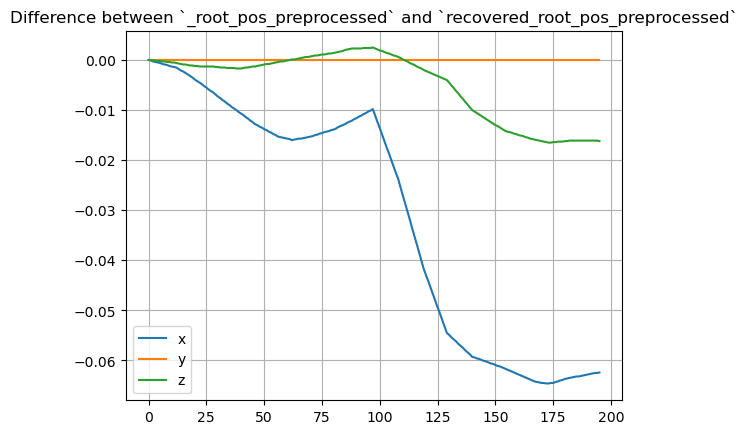

In [120]:
pd.DataFrame(difference, columns=["x", "y", "z"]).plot(
    title="Difference between `_root_pos_preprocessed` and `recovered_root_pos_preprocessed`", grid=True
)

In [62]:
vel_xz = np.array(
    [
        [-6.99724257e-03, 2.74971239e-02],
        [-7.00590573e-03, 2.74949186e-02],
        [-7.02196918e-03, 2.74908189e-02],
        [-7.04608858e-03, 2.74846498e-02],
        [-7.07889907e-03, 2.74762139e-02],
        [-7.12109264e-03, 2.74653099e-02],
        [-7.17333052e-03, 2.74516977e-02],
        [-7.23630609e-03, 2.74351966e-02],
        [-7.31070153e-03, 2.74154469e-02],
        [-7.39725679e-03, 2.73922216e-02],
        [-7.49665406e-03, 2.73651853e-02],
        [-7.60961510e-03, 2.73339897e-02],
        [-1.50281806e-02, 5.72135709e-02],
        [-1.53263360e-02, 5.71344495e-02],
        [-1.56575702e-02, 5.70445992e-02],
        [-1.60233993e-02, 5.69428876e-02],
        [-1.64254531e-02, 5.68281598e-02],
        [-6.02507172e-03, 6.79093227e-02],
        [-6.59971125e-03, 6.78558275e-02],
        [-7.22485036e-03, 6.77921176e-02],
        [-7.90286716e-03, 6.77164197e-02],
        [-8.63624364e-03, 6.76268637e-02],
        [-9.42757819e-03, 6.75210357e-02],
        [-2.08163448e-03, 7.12882131e-02],
        [-3.05093639e-03, 7.12533072e-02],
        [-4.09253594e-03, 7.12009594e-02],
        [-5.21027483e-03, 7.11280182e-02],
        [-6.40831189e-03, 7.10299835e-02],
        [-1.52595155e-02, 7.21366853e-02],
        [-1.66540630e-02, 7.18275458e-02],
        [-1.81414858e-02, 7.14663565e-02],
        [-1.97266117e-02, 7.10452870e-02],
        [-2.14144178e-02, 7.05547780e-02],
        [-2.32102051e-02, 6.99845701e-02],
        [-2.51193363e-02, 6.93222433e-02],
        [-2.07264218e-02, 6.71910048e-02],
        [-2.28382591e-02, 6.65027276e-02],
        [-2.50828005e-02, 6.56889305e-02],
        [-2.74656415e-02, 6.47290871e-02],
        [-2.99907718e-02, 6.35985062e-02],
        [-1.82200968e-02, 7.01518506e-02],
        [-2.14105025e-02, 6.92448169e-02],
        [-2.48041600e-02, 6.81026727e-02],
        [-2.84010917e-02, 6.66833296e-02],
        [-3.21931206e-02, 6.49373308e-02],
        [-3.61637138e-02, 6.28127381e-02],
        [-2.38348134e-02, 4.94891927e-02],
        [-2.73262672e-02, 4.76503298e-02],
        [-3.09034586e-02, 4.54123393e-02],
        [-3.45061533e-02, 4.27387953e-02],
        [-3.80587541e-02, 3.96082103e-02],
        [-4.14715409e-02, 3.60193141e-02],
        [-4.46480662e-02, 3.19977105e-02],
        [-4.74931151e-02, 2.75981501e-02],
        [-4.99269813e-02, 2.29036119e-02],
        [-5.18910810e-02, 1.80171989e-02],
        [-2.58867145e-02, 1.41961165e-02],
        [-2.70764790e-02, 1.17697846e-02],
        [-2.80056819e-02, 9.34585556e-03],
        [-2.86888778e-02, 6.97135925e-03],
        [-2.91502215e-02, 4.68273088e-03],
        [-2.94171907e-02, 2.50605121e-03],
        [3.74990702e-03, 2.28125937e-02],
        [2.26350315e-03, 2.30078213e-02],
        [8.69598240e-04, 2.31025331e-02],
        [-4.31751832e-04, 2.31146999e-02],
        [-1.64265186e-03, 2.30604708e-02],
        [-2.76818313e-03, 2.29522437e-02],
        [-3.81248817e-03, 2.28023827e-02],
        [5.07372804e-03, 3.24609242e-02],
        [3.77196446e-03, 3.26375924e-02],
        [2.54513789e-03, 3.27563286e-02],
        [1.38837751e-03, 3.28257009e-02],
        [2.97144987e-04, 3.28534879e-02],
        [-7.32642598e-04, 3.28468829e-02],
        [-1.70553848e-03, 3.28107588e-02],
        [-2.62537599e-03, 3.27499919e-02],
        [-3.49595770e-03, 3.26683000e-02],
        [-4.32065129e-03, 3.25697325e-02],
        [-5.10284677e-03, 3.24561335e-02],
        [-8.02331418e-03, 5.06563038e-02],
        [-9.12941806e-03, 5.04691377e-02],
        [-1.01828985e-02, 5.02667278e-02],
        [-1.11871511e-02, 5.00530303e-02],
        [-1.21460781e-02, 4.98287976e-02],
        [-1.30629316e-02, 4.95965481e-02],
        [-1.39412247e-02, 4.93566394e-02],
        [-1.47839449e-02, 4.91112545e-02],
        [2.87812157e-03, 5.25152311e-02],
        [2.03624601e-03, 5.25550917e-02],
        [1.21785700e-03, 5.25799468e-02],
        [4.20527998e-04, 5.25926054e-02],
        [-3.58755700e-04, 5.25930673e-02],
        [-1.12270471e-03, 5.25822937e-02],
        [-1.87417306e-03, 5.25606498e-02],
        [-2.61618150e-03, 5.25294170e-02],
        [-5.83897810e-03, 5.62651902e-02],
        [-6.61364943e-03, 5.61795309e-02],
        [-7.40681309e-03, 5.60804605e-02],
        [-8.19319300e-03, 5.59710935e-02],
        [-8.98535270e-03, 5.58492839e-02],
        [-9.78706405e-03, 5.57143986e-02],
        [-1.06015187e-02, 5.55650145e-02],
        [-1.14327632e-02, 5.54002300e-02],
        [-1.22836716e-02, 5.52176684e-02],
        [-1.31579470e-02, 5.50158769e-02],
        [-1.40589587e-02, 5.47925606e-02],
        [-1.49900019e-02, 5.45453355e-02],
        [-2.09539793e-02, 6.89192712e-02],
        [-2.22237632e-02, 6.85203522e-02],
        [-2.35423744e-02, 6.80784583e-02],
        [-2.49123871e-02, 6.75893724e-02],
        [-2.63364762e-02, 6.70471787e-02],
        [-2.78160572e-02, 6.64469898e-02],
        [-2.93522738e-02, 6.57829046e-02],
        [-3.09449434e-02, 6.50488585e-02],
        [-3.25930789e-02, 6.42387569e-02],
        [-3.42947058e-02, 6.33467883e-02],
        [-3.60463150e-02, 6.23666793e-02],
        [-3.05377953e-02, 4.81463447e-02],
        [-3.19792964e-02, 4.72011417e-02],
        [-3.34445089e-02, 4.61745784e-02],
        [-3.49261165e-02, 4.50643003e-02],
        [-3.64160948e-02, 4.38690707e-02],
        [-3.79050523e-02, 4.25891280e-02],
        [-3.93834300e-02, 4.12258580e-02],
        [-4.08406928e-02, 3.97826806e-02],
        [-4.22666185e-02, 3.82643342e-02],
        [-4.36510481e-02, 3.66771147e-02],
        [-3.06482166e-02, -2.66859867e-03],
        [-3.05275619e-02, -3.80793214e-03],
        [-3.03651802e-02, -4.93871234e-03],
        [-3.01626138e-02, -6.05406426e-03],
        [-2.99223326e-02, -7.14767165e-03],
        [-2.96473801e-02, -8.21368955e-03],
        [-2.93415226e-02, -9.24715959e-03],
        [-2.90086754e-02, -1.02436207e-02],
        [-2.86531411e-02, -1.11996531e-02],
        [-2.82792933e-02, -1.21125598e-02],
        [-2.78915167e-02, -1.29806940e-02],
        [-1.20382365e-02, -8.65294319e-03],
        [-1.17874593e-02, -8.99158977e-03],
        [-1.15391072e-02, -9.30816028e-03],
        [-1.12946946e-02, -9.60325636e-03],
        [-1.10555459e-02, -9.87763703e-03],
        [-1.08226947e-02, -1.01322224e-02],
        [-1.05970763e-02, -1.03679728e-02],
        [-1.03793312e-02, -1.05859404e-02],
        [-1.01700425e-02, -1.07871694e-02],
        [-9.96955298e-03, -1.09727345e-02],
        [-9.77809541e-03, -1.11436732e-02],
        [-9.59583558e-03, -1.13010006e-02],
        [-9.42279398e-03, -1.14456909e-02],
        [-9.25889052e-03, -1.15786772e-02],
        [-9.90630500e-03, -4.68789693e-03],
        [-9.84730385e-03, -4.81057353e-03],
        [-9.79097746e-03, -4.92416415e-03],
        [-9.73724201e-03, -5.02961595e-03],
        [-9.68630239e-03, -5.12708863e-03],
        [-9.63805057e-03, -5.21723041e-03],
        [-9.59248096e-03, -5.30041428e-03],
        [-9.54954885e-03, -5.37746074e-03],
        [-9.50925611e-03, -5.44845033e-03],
        [-9.47143883e-03, -5.51392464e-03],
        [-9.43604857e-03, -5.57427295e-03],
        [-9.40295309e-03, -5.62987151e-03],
        [-9.37213842e-03, -5.68106491e-03],
        [-4.18510195e-03, -3.78511916e-03],
        [-3.57892737e-03, -4.08784579e-03],
        [-3.31734866e-03, -4.36381716e-03],
        [-2.34935340e-03, -4.82096011e-03],
        [-1.33437151e-03, -3.96693824e-03],
        [-4.22308221e-05, -2.09175260e-03],
        [1.53578969e-03, -1.42755103e-04],
        [3.34842596e-03, 1.36859971e-03],
        [4.83561866e-03, 2.18922109e-03],
        [6.41733501e-03, 2.22738180e-03],
        [6.93387073e-03, 1.73952524e-03],
        [6.79625664e-03, 1.74347963e-03],
        [6.39837515e-03, 2.04854552e-03],
        [5.63471857e-03, 1.90272368e-03],
        [4.93610604e-03, 1.50299259e-03],
        [4.05918574e-03, 4.89706872e-04],
        [3.88990063e-03, 2.02640891e-04],
        [3.61989974e-03, 1.84408622e-04],
        [3.64081049e-03, 1.77303562e-04],
        [3.74232419e-03, -5.46800438e-05],
        [3.89460195e-03, 3.54355667e-04],
        [4.02717851e-03, 4.18707728e-04],
        [4.09864867e-03, 2.16248212e-04],
        [4.10074834e-03, -4.65335324e-05],
        [3.88838910e-03, -1.22286845e-04],
        [3.65226669e-03, -3.42916232e-04],
        [2.97492510e-03, -7.61257252e-04],
        [2.80130701e-03, -1.13577675e-03],
        [2.54633138e-03, -1.30791590e-03],
    ]
)

In [63]:
gt_xyz = np.array(
    [
        [0.0, 0.9901938, 0.0],
        [-0.00982208, 0.9861231, 0.02661917],
        [-0.01964416, 0.98205245, 0.05323833],
        [-0.02946623, 0.97798175, 0.0798575],
        [-0.03928832, 0.9739111, 0.10647666],
        [-0.04911039, 0.9698404, 0.13309583],
        [-0.05893247, 0.96576977, 0.159715],
        [-0.06875455, 0.96169907, 0.18633415],
        [-0.07857663, 0.9576284, 0.21295333],
        [-0.0883987, 0.9535577, 0.2395725],
        [-0.09822078, 0.9494871, 0.26619166],
        [-0.10804286, 0.94541645, 0.29281083],
        [-0.11786494, 0.94134575, 0.31943],
        [-0.13726701, 0.94978416, 0.375312],
        [-0.15666907, 0.95822257, 0.43119404],
        [-0.17607114, 0.966661, 0.4870761],
        [-0.1954732, 0.9750993, 0.54295814],
        [-0.21487525, 0.98353773, 0.5988401],
        [-0.22395298, 0.9755671, 0.66640913],
        [-0.2330307, 0.9675964, 0.7339781],
        [-0.24210843, 0.9596258, 0.80154705],
        [-0.25118616, 0.9516551, 0.869116],
        [-0.2602639, 0.9436844, 0.936685],
        [-0.26934162, 0.93571377, 1.004254],
        [-0.27015337, 0.9478872, 1.075568],
        [-0.27096516, 0.96006054, 1.1468819],
        [-0.27177694, 0.97223395, 1.2181958],
        [-0.2725887, 0.98440737, 1.2895098],
        [-0.2734005, 0.9965808, 1.3608236],
        [-0.28162634, 0.988978, 1.4340963],
        [-0.2898522, 0.98137534, 1.507369],
        [-0.29807806, 0.9737726, 1.5806417],
        [-0.30630392, 0.9661699, 1.6539146],
        [-0.31452978, 0.9585672, 1.7271873],
        [-0.32275563, 0.95096445, 1.80046],
        [-0.33098152, 0.94336176, 1.8737327],
        [-0.33336848, 0.95402354, 1.9440073],
        [-0.3357555, 0.9646854, 2.0142817],
        [-0.33814248, 0.97534716, 2.084556],
        [-0.34052947, 0.98600894, 2.1548307],
        [-0.34291646, 0.9966708, 2.2251053],
        [-0.32887256, 0.98783976, 2.296211],
        [-0.31482866, 0.97900873, 2.3673167],
        [-0.30078477, 0.97017777, 2.4384222],
        [-0.28674087, 0.96134675, 2.5095282],
        [-0.27269697, 0.9525158, 2.5806339],
        [-0.25865307, 0.94368476, 2.6517396],
        [-0.24056944, 0.94533926, 2.7036073],
        [-0.2224858, 0.94699377, 2.755475],
        [-0.20440213, 0.9486483, 2.807343],
        [-0.18631849, 0.9503028, 2.8592107],
        [-0.16823484, 0.9519572, 2.9110785],
        [-0.1501512, 0.95361173, 2.9629462],
        [-0.13206755, 0.95526624, 3.0148141],
        [-0.11398389, 0.95692074, 3.0666816],
        [-0.09590023, 0.95857525, 3.1185493],
        [-0.07781658, 0.96022975, 3.1704173],
        [-0.06121522, 0.96558124, 3.1948314],
        [-0.04461385, 0.9709328, 3.2192457],
        [-0.02801248, 0.97628427, 3.24366],
        [-0.01141112, 0.98163575, 3.268074],
        [0.00519024, 0.98698723, 3.2924883],
        [0.02179161, 0.9923388, 3.3169024],
        [0.03879183, 0.9898896, 3.301235],
        [0.05579204, 0.98744047, 3.2855673],
        [0.07279226, 0.9849913, 3.2698996],
        [0.08979248, 0.98254216, 3.2542322],
        [0.1067927, 0.98009306, 3.2385645],
        [0.12379291, 0.9776439, 3.2228973],
        [0.14079313, 0.97519475, 3.2072296],
        [0.15546043, 0.9741972, 3.1778302],
        [0.17012773, 0.97319967, 3.148431],
        [0.18479505, 0.9722021, 3.1190317],
        [0.19946235, 0.9712046, 3.0896323],
        [0.21412966, 0.97020704, 3.060233],
        [0.22879696, 0.9692095, 3.0308337],
        [0.24346428, 0.96821195, 3.0014343],
        [0.2581316, 0.9672144, 2.972035],
        [0.27279887, 0.96621686, 2.9426358],
        [0.2874662, 0.9652193, 2.9132364],
        [0.3021335, 0.9642218, 2.8838372],
        [0.32402453, 0.9663301, 2.837456],
        [0.34591553, 0.9684385, 2.7910743],
        [0.36780655, 0.9705469, 2.744693],
        [0.38969758, 0.97265524, 2.6983116],
        [0.4115886, 0.97476363, 2.6519303],
        [0.4334796, 0.976872, 2.6055489],
        [0.45537063, 0.97898036, 2.5591676],
        [0.47726166, 0.98108876, 2.512786],
        [0.4813222, 0.97768426, 2.4603488],
        [0.48538274, 0.97427976, 2.4079113],
        [0.48944327, 0.97087526, 2.3554742],
        [0.4935038, 0.96747077, 2.303037],
        [0.49756435, 0.96406627, 2.2505996],
        [0.5016249, 0.96066177, 2.1981623],
        [0.50568545, 0.9572573, 2.1457253],
        [0.50974596, 0.9538528, 2.0932877],
        [0.51634437, 0.9534837, 2.0371065],
        [0.52294284, 0.95311457, 1.9809252],
        [0.52954125, 0.9527455, 1.9247439],
        [0.53613967, 0.9523764, 1.8685625],
        [0.5427381, 0.95200735, 1.8123811],
        [0.54933655, 0.9516383, 1.7561998],
        [0.5559349, 0.95126915, 1.7000186],
        [0.5625334, 0.9509001, 1.6438372],
        [0.5691318, 0.950531, 1.5876559],
        [0.5757302, 0.95016193, 1.5314746],
        [0.5823286, 0.94979286, 1.4752933],
        [0.5889271, 0.94942373, 1.4191118],
        [0.5979906, 0.947664, 1.34765],
        [0.60705405, 0.9459043, 1.2761883],
        [0.61611766, 0.94414455, 1.2047266],
        [0.62518114, 0.94238484, 1.1332647],
        [0.6342447, 0.94062513, 1.0618029],
        [0.64330816, 0.93886536, 0.99034107],
        [0.6523717, 0.93710566, 0.9188792],
        [0.66143525, 0.93534595, 0.84741735],
        [0.6704987, 0.9335862, 0.7759556],
        [0.6795622, 0.9318265, 0.70449376],
        [0.6886258, 0.93006676, 0.63303196],
        [0.69648427, 0.9344233, 0.57656187],
        [0.7043428, 0.93877995, 0.52009183],
        [0.7122013, 0.9431366, 0.46362174],
        [0.72005975, 0.94749314, 0.40715167],
        [0.72791827, 0.95184976, 0.35068157],
        [0.7357767, 0.9562064, 0.29421148],
        [0.7436353, 0.96056294, 0.23774141],
        [0.7514938, 0.96491957, 0.18127134],
        [0.75935227, 0.96927613, 0.12480126],
        [0.7672108, 0.97363275, 0.06833118],
        [0.7910536, 0.9737762, 0.04889011],
        [0.81489635, 0.9739197, 0.02944904],
        [0.83873916, 0.9740631, 0.01000797],
        [0.86258197, 0.97420657, -0.00943311],
        [0.8864248, 0.97435004, -0.02887418],
        [0.91026753, 0.9744935, -0.04831525],
        [0.93411034, 0.9746369, -0.06775633],
        [0.95795316, 0.9747804, -0.0871974],
        [0.98179597, 0.97492385, -0.10663847],
        [1.0056387, 0.9750673, -0.12607954],
        [1.0294815, 0.9752107, -0.14552061],
        [1.0423021, 0.97526574, -0.1529654],
        [1.0551227, 0.97532076, -0.1604102],
        [1.0679433, 0.9753758, -0.167855],
        [1.0807639, 0.9754307, -0.17529978],
        [1.0935845, 0.97548574, -0.18274458],
        [1.1064051, 0.97554076, -0.19018936],
        [1.1192257, 0.9755958, -0.19763416],
        [1.1320463, 0.9756507, -0.20507894],
        [1.144867, 0.97570574, -0.21252374],
        [1.1576875, 0.97576076, -0.21996854],
        [1.1705081, 0.9758158, -0.22741333],
        [1.1833287, 0.9758707, -0.23485811],
        [1.1961493, 0.97592574, -0.24230291],
        [1.20897, 0.97598076, -0.24974771],
        [1.2149496, 0.9761884, -0.2589322],
        [1.2209293, 0.97639614, -0.26811668],
        [1.2269088, 0.9766038, -0.27730122],
        [1.2328885, 0.9768115, -0.2864857],
        [1.2388681, 0.9770192, -0.2956702],
        [1.2448478, 0.9772269, -0.30485472],
        [1.2508273, 0.9774346, -0.31403923],
        [1.256807, 0.9776423, -0.3232237],
        [1.2627866, 0.97784996, -0.33240822],
        [1.2687663, 0.9780577, -0.34159273],
        [1.274746, 0.97826535, -0.35077724],
        [1.2807256, 0.97847307, -0.35996172],
        [1.2867053, 0.97868073, -0.36914623],
        [1.2906026, 0.97900873, -0.37322706],
        [1.2947699, 0.9793348, -0.37671313],
        [1.2991934, 0.98001677, -0.37995046],
        [1.3040473, 0.9814358, -0.38223085],
        [1.3080282, 0.98276573, -0.38352305],
        [1.3101202, 0.9837388, -0.3835501],
        [1.3102566, 0.9845787, -0.38201374],
        [1.3088837, 0.9841248, -0.3786671],
        [1.306701, 0.9827378, -0.37382853],
        [1.3044978, 0.9818317, -0.36740282],
        [1.3028002, 0.98241174, -0.36045858],
        [1.3011119, 0.98305976, -0.3536484],
        [1.2991278, 0.98285073, -0.34722975],
        [1.297292, 0.98243976, -0.34157288],
        [1.2958559, 0.9824778, -0.3366169],
        [1.2954274, 0.9828988, -0.3325508],
        [1.2952892, 0.98322374, -0.32865807],
        [1.2951696, 0.98339677, -0.32503545],
        [1.2950622, 0.98322177, -0.3213919],
        [1.2951932, 0.98287076, -0.31765148],
        [1.2949228, 0.98235476, -0.31375015],
        [1.2945954, 0.98177975, -0.30971453],
        [1.2944762, 0.9813418, -0.3056119],
        [1.2946237, 0.9813548, -0.30151355],
        [1.2948455, 0.98150474, -0.29762957],
        [1.295285, 0.98145175, -0.29398766],
        [1.2961273, 0.9813688, -0.29103467],
        [1.2973416, 0.98134875, -0.28826648],
        [1.2987227, 0.9815208, -0.28575912],
    ],
    dtype=np.float32,
)

In [81]:
display_markdown("### First/Last `4` Frames of Ground Truth", raw=True)
print(gt_xyz[:4])
print("...")
print(gt_xyz[-4:])

for dtype in [np.float16, np.float32, np.float64]:
    r_pos = np.zeros((vel_xz.shape[0] + 1, vel_xz.shape[1]), dtype=dtype)
    r_pos[1:] = vel_xz
    r_pos = np.cumsum(r_pos, axis=-2)

    display_markdown(f"### First/Last `4` Frames using `{dtype.__name__}`", raw=True)
    print(r_pos[:4])
    print("...")
    print(r_pos[-4:])

### First/Last `4` Frames of Ground Truth

[[ 0.          0.9901938   0.        ]
 [-0.00982208  0.9861231   0.02661917]
 [-0.01964416  0.98205245  0.05323833]
 [-0.02946623  0.97798175  0.0798575 ]]
...
[[ 1.295285    0.98145175 -0.29398766]
 [ 1.2961273   0.9813688  -0.29103467]
 [ 1.2973416   0.98134875 -0.28826648]
 [ 1.2987227   0.9815208  -0.28575912]]


### First/Last `4` Frames using `float16`

[[ 0.        0.      ]
 [-0.006996  0.0275  ]
 [-0.01401   0.055   ]
 [-0.02103   0.0825  ]]
...
[[-2.643  5.86 ]
 [-2.639  5.86 ]
 [-2.637  5.86 ]
 [-2.635  5.86 ]]


### First/Last `4` Frames using `float32`

[[ 0.          0.        ]
 [-0.00699724  0.02749712]
 [-0.01400315  0.05499204]
 [-0.02102512  0.08248286]]
...
[[-2.6414487  5.8682437]
 [-2.6384737  5.8674827]
 [-2.6356723  5.866347 ]
 [-2.633126   5.865039 ]]


### First/Last `4` Frames using `float64`

[[ 0.          0.        ]
 [-0.00699724  0.02749712]
 [-0.01400315  0.05499204]
 [-0.02102512  0.08248286]]
...
[[-2.64144902  5.86824303]
 [-2.63847409  5.86748177]
 [-2.63567279  5.86634599]
 [-2.63312645  5.86503808]]


### Roundtrip Error of `GT Position -> Velocity -> Position`

                  x             z
count  1.970000e+02  1.970000e+02
mean   1.290615e-09  6.003958e-10
std    8.588436e-10  8.702244e-10
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    1.862645e-09  0.000000e+00
75%    1.862645e-09  1.862645e-09
max    1.862645e-09  1.862645e-09


<Axes: title={'center': 'Velocity'}>

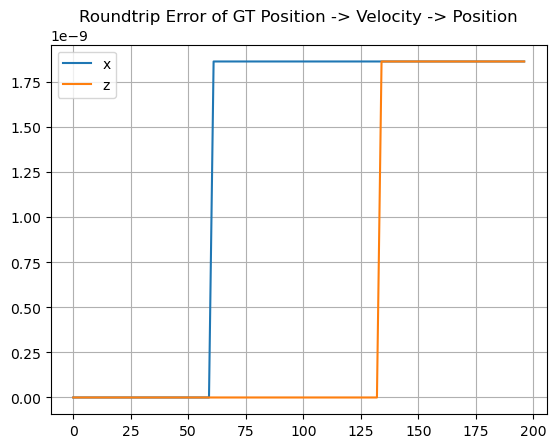

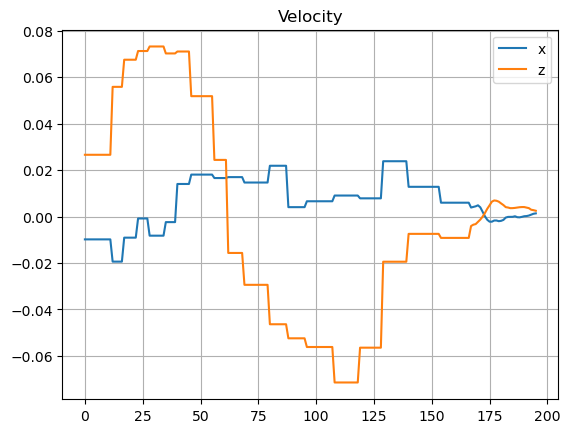

In [122]:
display_markdown("### Roundtrip Error of `GT Position -> Velocity -> Position`", raw=True)
my_vel = gt_xyz[1:] - gt_xyz[:-1]   # Velocity from Groundtruth Position

my_xyz = np.zeros((my_vel.shape[0] + 1, my_vel.shape[1]))
my_xyz[1:] = my_vel
my_xyz = np.cumsum(my_xyz, axis=0)  # Position from Velocity
diff_my_gt = my_xyz[..., [0, 2]] - gt_xyz[..., [0, 2]]  # XZ Difference

diff_my_gt_df = pd.DataFrame(diff_my_gt, columns=["x", "z"])
print(diff_my_gt_df.describe())
diff_my_gt_df.plot(title="Roundtrip Error of GT Position -> Velocity -> Position", grid=True)

pd.DataFrame(my_vel[..., [0, 2]], columns=["x", "z"]).plot(title="Velocity", grid=True)